In [ ]:
Predicting Loan Approvals Based on Applicant Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
#load the Dataset
df=pd.read_csv(r"C:\Users\ladwa\Desktop\New folder (10)\Loan_aproval.csv")

In [149]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [150]:
#Data Cleaning
#check for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [151]:
# Fill missing values using mode

In [152]:
df["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [153]:
df["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [154]:
df["Married"]=df["Married"].fillna("Yes")

In [155]:
#filling Null Values
df["Gender"]=df["Gender"].fillna("Male")

In [156]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [157]:
df["Dependents"]=df["Dependents"].fillna("0")

In [158]:
df["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [159]:
df["Self_Employed"]=df["Self_Employed"].fillna("No")

In [160]:
df["LoanAmount"].mode()

0    120.0
Name: LoanAmount, dtype: float64

In [161]:
df["LoanAmount"]=df["LoanAmount"].fillna(120.0)

In [162]:
loan_term=df["Loan_Amount_Term"].mode()
print(loan_term)

0    360.0
Name: Loan_Amount_Term, dtype: float64


In [163]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(360.0)

In [164]:
Credit_score=df["Credit_History"].mode()
print(Credit_score)

0    1.0
Name: Credit_History, dtype: float64


In [168]:
df["Credit_History"]=df["Credit_History"].fillna(1.0)

In [169]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
#change credit_history in int to make it in binary format
df["Credit_History"]=df["Credit_History"].astype(int)

In [22]:
#checking for dupliacte values
df.duplicated().sum()

0

In [23]:
"""all missing values in the dataset were handled by filling them with the mode.
   and change the data type of credit score to make it binary."""

'all missing values in the dataset were handled by filling them with the mode.\n   and change the data type of credit score to make it binary.'

In [24]:
#Expolatory Data Analysis(EDA)

In [25]:
#loan approval distribution
loan_stat=df["Loan_Status"].value_counts()
print(loan_stat)

Loan_Status
Y    422
N    192
Name: count, dtype: int64


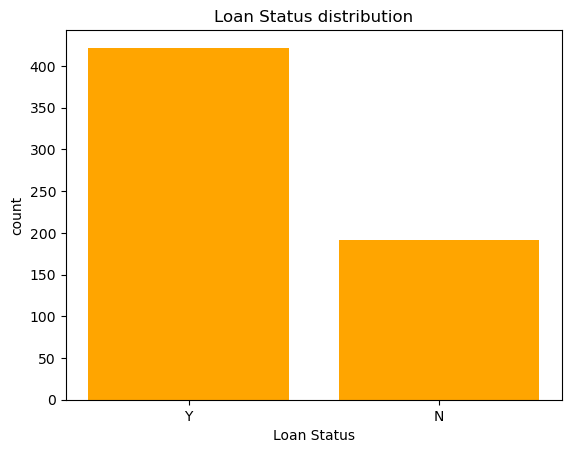

In [26]:
#Graphic representation of loan distribution
plt.bar(loan_stat.index,loan_stat.values,color='orange')
plt.title("Loan Status distribution")
plt.xlabel("Loan Status")
plt.ylabel("count")
plt.show()

In [27]:
#Check relation between Credit_score and Loan_status using crosstab()
Credit_loan=pd.crosstab(df["Credit_History"],df["Loan_Status"])
print(Credit_loan)

Loan_Status       N    Y
Credit_History          
0                82    7
1               110  415


In [28]:
#visaulize the relation between Credit_History and Loan_Status

Text(0, 0.5, 'Count')

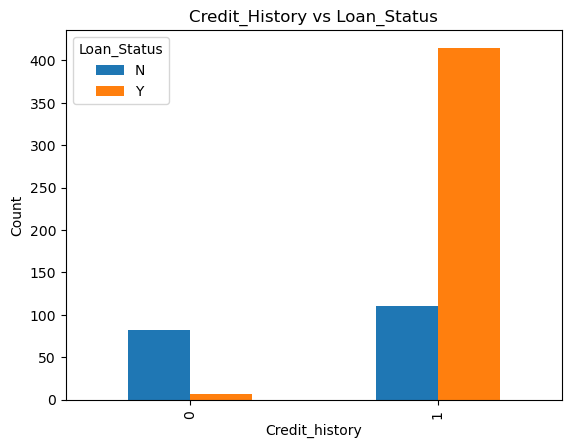

In [29]:
Credit_loan.plot(kind='bar')
plt.title("Credit_History vs Loan_Status")
plt.xlabel("Credit_history")
plt.ylabel("Count")


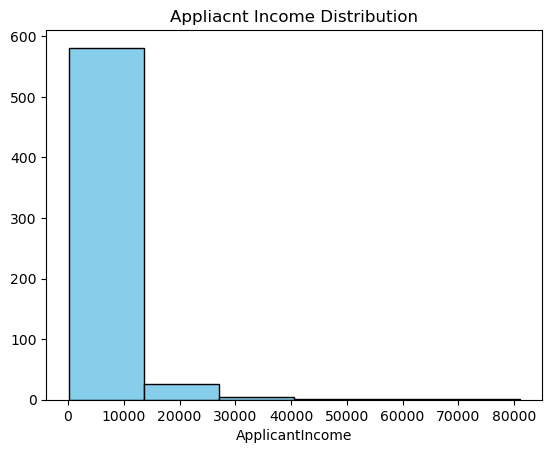

In [30]:
#ApplicantIncome Distribution
plt.hist(df["ApplicantIncome"],bins=6,color="skyblue",edgecolor="black")
plt.title("Appliacnt Income Distribution")
plt.xlabel("ApplicantIncome")
plt.show()

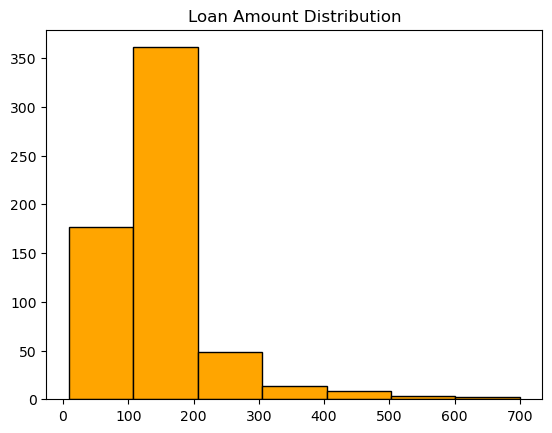

In [31]:
#loan Amount Distribution
plt.hist(df["LoanAmount"],bins=7,color="orange",edgecolor="black")
plt.title("Loan Amount Distribution")
plt.show()

In [32]:
"""
ApplicantIncome and LoanAmount are right-skewed, with most values 
concentrated in the lower range and few extreme high values.
"""

'\nApplicantIncome and LoanAmount are right-skewed, with most values \nconcentrated in the lower range and few extreme high values.\n'

In [33]:
#select the features and target 
X=df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Self_Employed"]]
Y=df["Loan_Status"]

In [34]:
#Encode values of column "Self_Employed using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X.loc[:,"Self_Employed"]=le.fit_transform(df["Self_Employed"])

In [35]:
#Using train test split to train the data 


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,
                                               test_size=0.2,random_state=42)

In [140]:
#Encode the target yes or no into 1 or 0
y_encod_train=le.fit_transform(y_train)
y_test_encode=le.fit_transform(y_test)

In [37]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [38]:
#Train the model we use LogisticRegression to predict the target


In [118]:
#import LogisticRegression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

#train the model using featuers and target
model.fit(x_train_scaled,y_encod_train)

#predict the Output
y_pred=model.predict(x_test_scaled)

In [119]:
for pred in y_pred:
    if (pred==0):
        print("Not Approved")
    else:
        print("Loan Approved")

Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Not Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Not Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Not Approved
Not Approved
Not Approved
Loan Approved
Loan Approved
Not Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Not Approved
Loan Approved
Not Approved
Loan Approved
Not Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Not Approved
Loan Approved
Lo

In [141]:
#Evaluate the Model 
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test_encode,y_pred))

Accuracy Score: 0.7886178861788617


In [170]:
#create a function to enter the applicant data
def user_data():
    Loan_ID=input("Enter Loan ID:")
    Gender=input("Enter Gender:")
    Married=input("Enter Married Status Yes or No:")
    Dependents=int(input("Enter dependents in your house in number:"))
    Education=input("Enter you education:")
    Self_Employed=int(input("Enter Self_employeed Yes(1) or No(0):"))
    ApplicantIncome=int(input("Enter you Income:"))
    CoapplicantIncome=float(input("Enter you Partner Income:"))
    LoanAmount=float(input("Enter Loan Amount"))
    Loan_Amount_Term=float(input("Enter loan amount term"))
    Credit_History=int(input("Enter good(1) or not good(0)"))
    
    #now select the fetaures
    user_rec={
    "ApplicantIncome":ApplicantIncome,
    "CoapplicantIncome":CoapplicantIncome,
    "LoanAmount":LoanAmount,
    "Loan_Amount_Term":Loan_Amount_Term,
    "Credit_History":Credit_History,
    "Self_Employed":Self_Employed,
    
    }
    return user_rec


In [132]:
#Predict the result using the Applicant data
def user_predict_data():
    user=user_data()
    Applicant=pd.DataFrame([user])
    Applicant_data=scaler.fit_transform(Applicant)
    model_predict=model.predict(Applicant_data)
    print(model_predict)

    print("Approved") if model_predict[0]==1 else print("Not Approved")

In [147]:
#define a function to predict the result 
def user():
    Result=user_predict_data()
    return Result


In [144]:
#test the user data or call the function 
New_r=user()

Enter Loan ID: LP001334
Enter Gender: Male
Enter Married Status Yes or No: Yes
Enter dependents in your house in number: 3
Enter you education: Graduate
Enter Self_employeed Yes(1) or No(0): 1
Enter you Income: 45000
Enter you Partner Income: 40000
Enter Loan Amount 250000
Enter loan amount term 360
Enter good(1) or not good(0) 1


[1]
Approved
